In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv("covid-19.csv")
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


# EDA

In [3]:
df.shape

(58, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [5]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

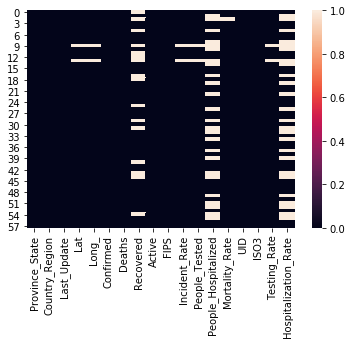

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df['Country_Region'].unique()

array(['US'], dtype=object)

In [8]:
df['Last_Update'].unique()

array(['2020-05-21 02:32:54'], dtype=object)

In [9]:
#filling missing data with imputation for numerical data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
df['People_Hospitalized']=imp.fit_transform(df['People_Hospitalized'].values.reshape(-1,1))
df['Hospitalization_Rate']=imp.fit_transform(df['Hospitalization_Rate'].values.reshape(-1,1))
df['Incident_Rate']=imp.fit_transform(df['Incident_Rate'].values.reshape(-1,1))
df['People_Tested']=imp.fit_transform(df['People_Tested'].values.reshape(-1,1))
df['Testing_Rate']=imp.fit_transform(df['Testing_Rate'].values.reshape(-1,1))

In [10]:
#filling missing data with REPLACE for nan data where 0 is needed.
df['Recovered'].replace(np.nan, 0,inplace=True)
df['Mortality_Rate'].replace(np.nan, 0,inplace=True)

In [11]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     2
Long_                   2
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [12]:
df=df.drop(columns=['Lat','Long_','Country_Region','Last_Update'],axis=1)

In [13]:
# Coding categorical data in numeric form for data usage
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [14]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,401,10,352.0,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,4,5063.940017,14.342541
2,2,0,0,0.0,0.0,60,0.000000,124.0,4897.454545,0.000000,16,0,222.857246,14.342541
3,3,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584


In [15]:
df.describe()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,28.500000,26756.086207,1611.017241,5074.344828,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.381382,7.676194e+07,3.844828,3894.186870,14.342541
std,16.886879,52562.031122,4084.750891,10393.125384,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.195667,2.378302e+07,0.720665,1898.951207,3.781861
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,0.000000,97.702058,6.778043
25%,14.250000,2596.000000,74.000000,0.000000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,2.952622,8.400001e+07,4.000000,2741.843521,12.829963
50%,28.500000,10148.500000,385.000000,1079.500000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.382399,8.400003e+07,4.000000,3501.526835,14.342541
75%,42.750000,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4.000000,4622.586404,15.552021
max,57.000000,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,5.000000,11377.424693,28.054438


# Data Visualisation

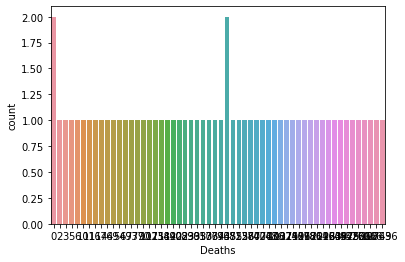

In [16]:
#univarite analysis
sns.countplot(df['Deaths'])
plt.show()

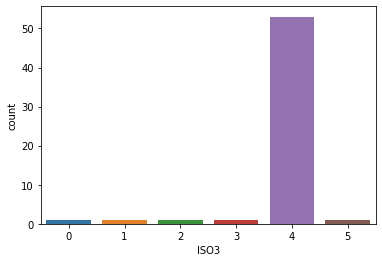

In [17]:
sns.countplot(df['ISO3'])
plt.show()

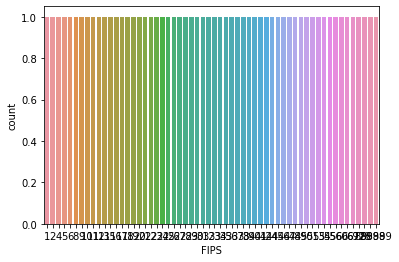

In [18]:
sns.countplot(df['FIPS'])
plt.show()

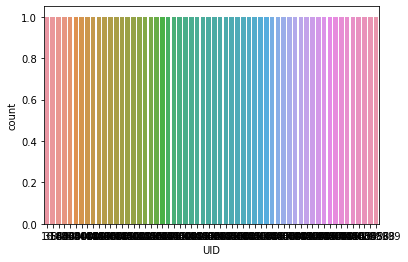

In [19]:
sns.countplot(df['UID'])
plt.show()

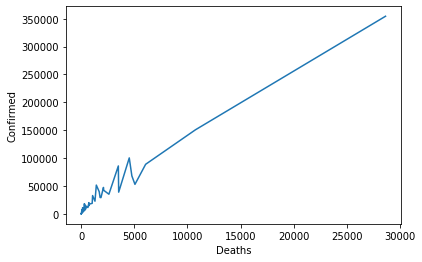

In [20]:
#bivariate analysis
sns.lineplot(x='Deaths',y='Confirmed',data=df) 
plt.show()

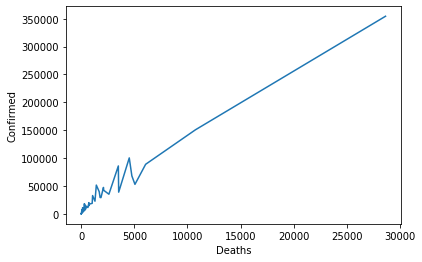

In [21]:
sns.lineplot(x='Deaths',y='Confirmed',data=df) 
plt.show()

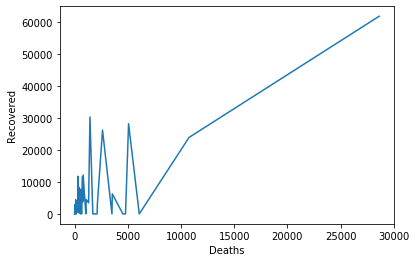

In [22]:
sns.lineplot(x='Deaths',y='Recovered',data=df) 
plt.show()

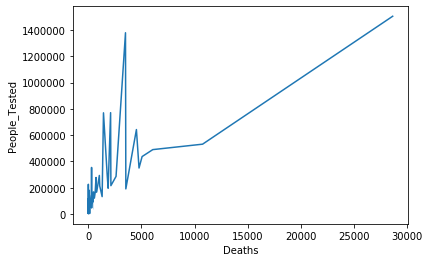

In [23]:
sns.lineplot(x='Deaths',y='People_Tested',data=df) 
plt.show()

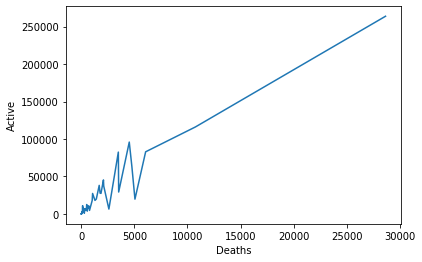

In [24]:
sns.lineplot(x='Deaths',y='Active',data=df) 
plt.show()

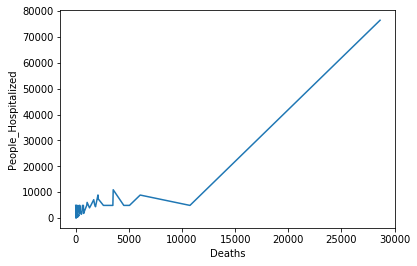

In [25]:
sns.lineplot(x='Deaths',y='People_Hospitalized',data=df) 
plt.show()

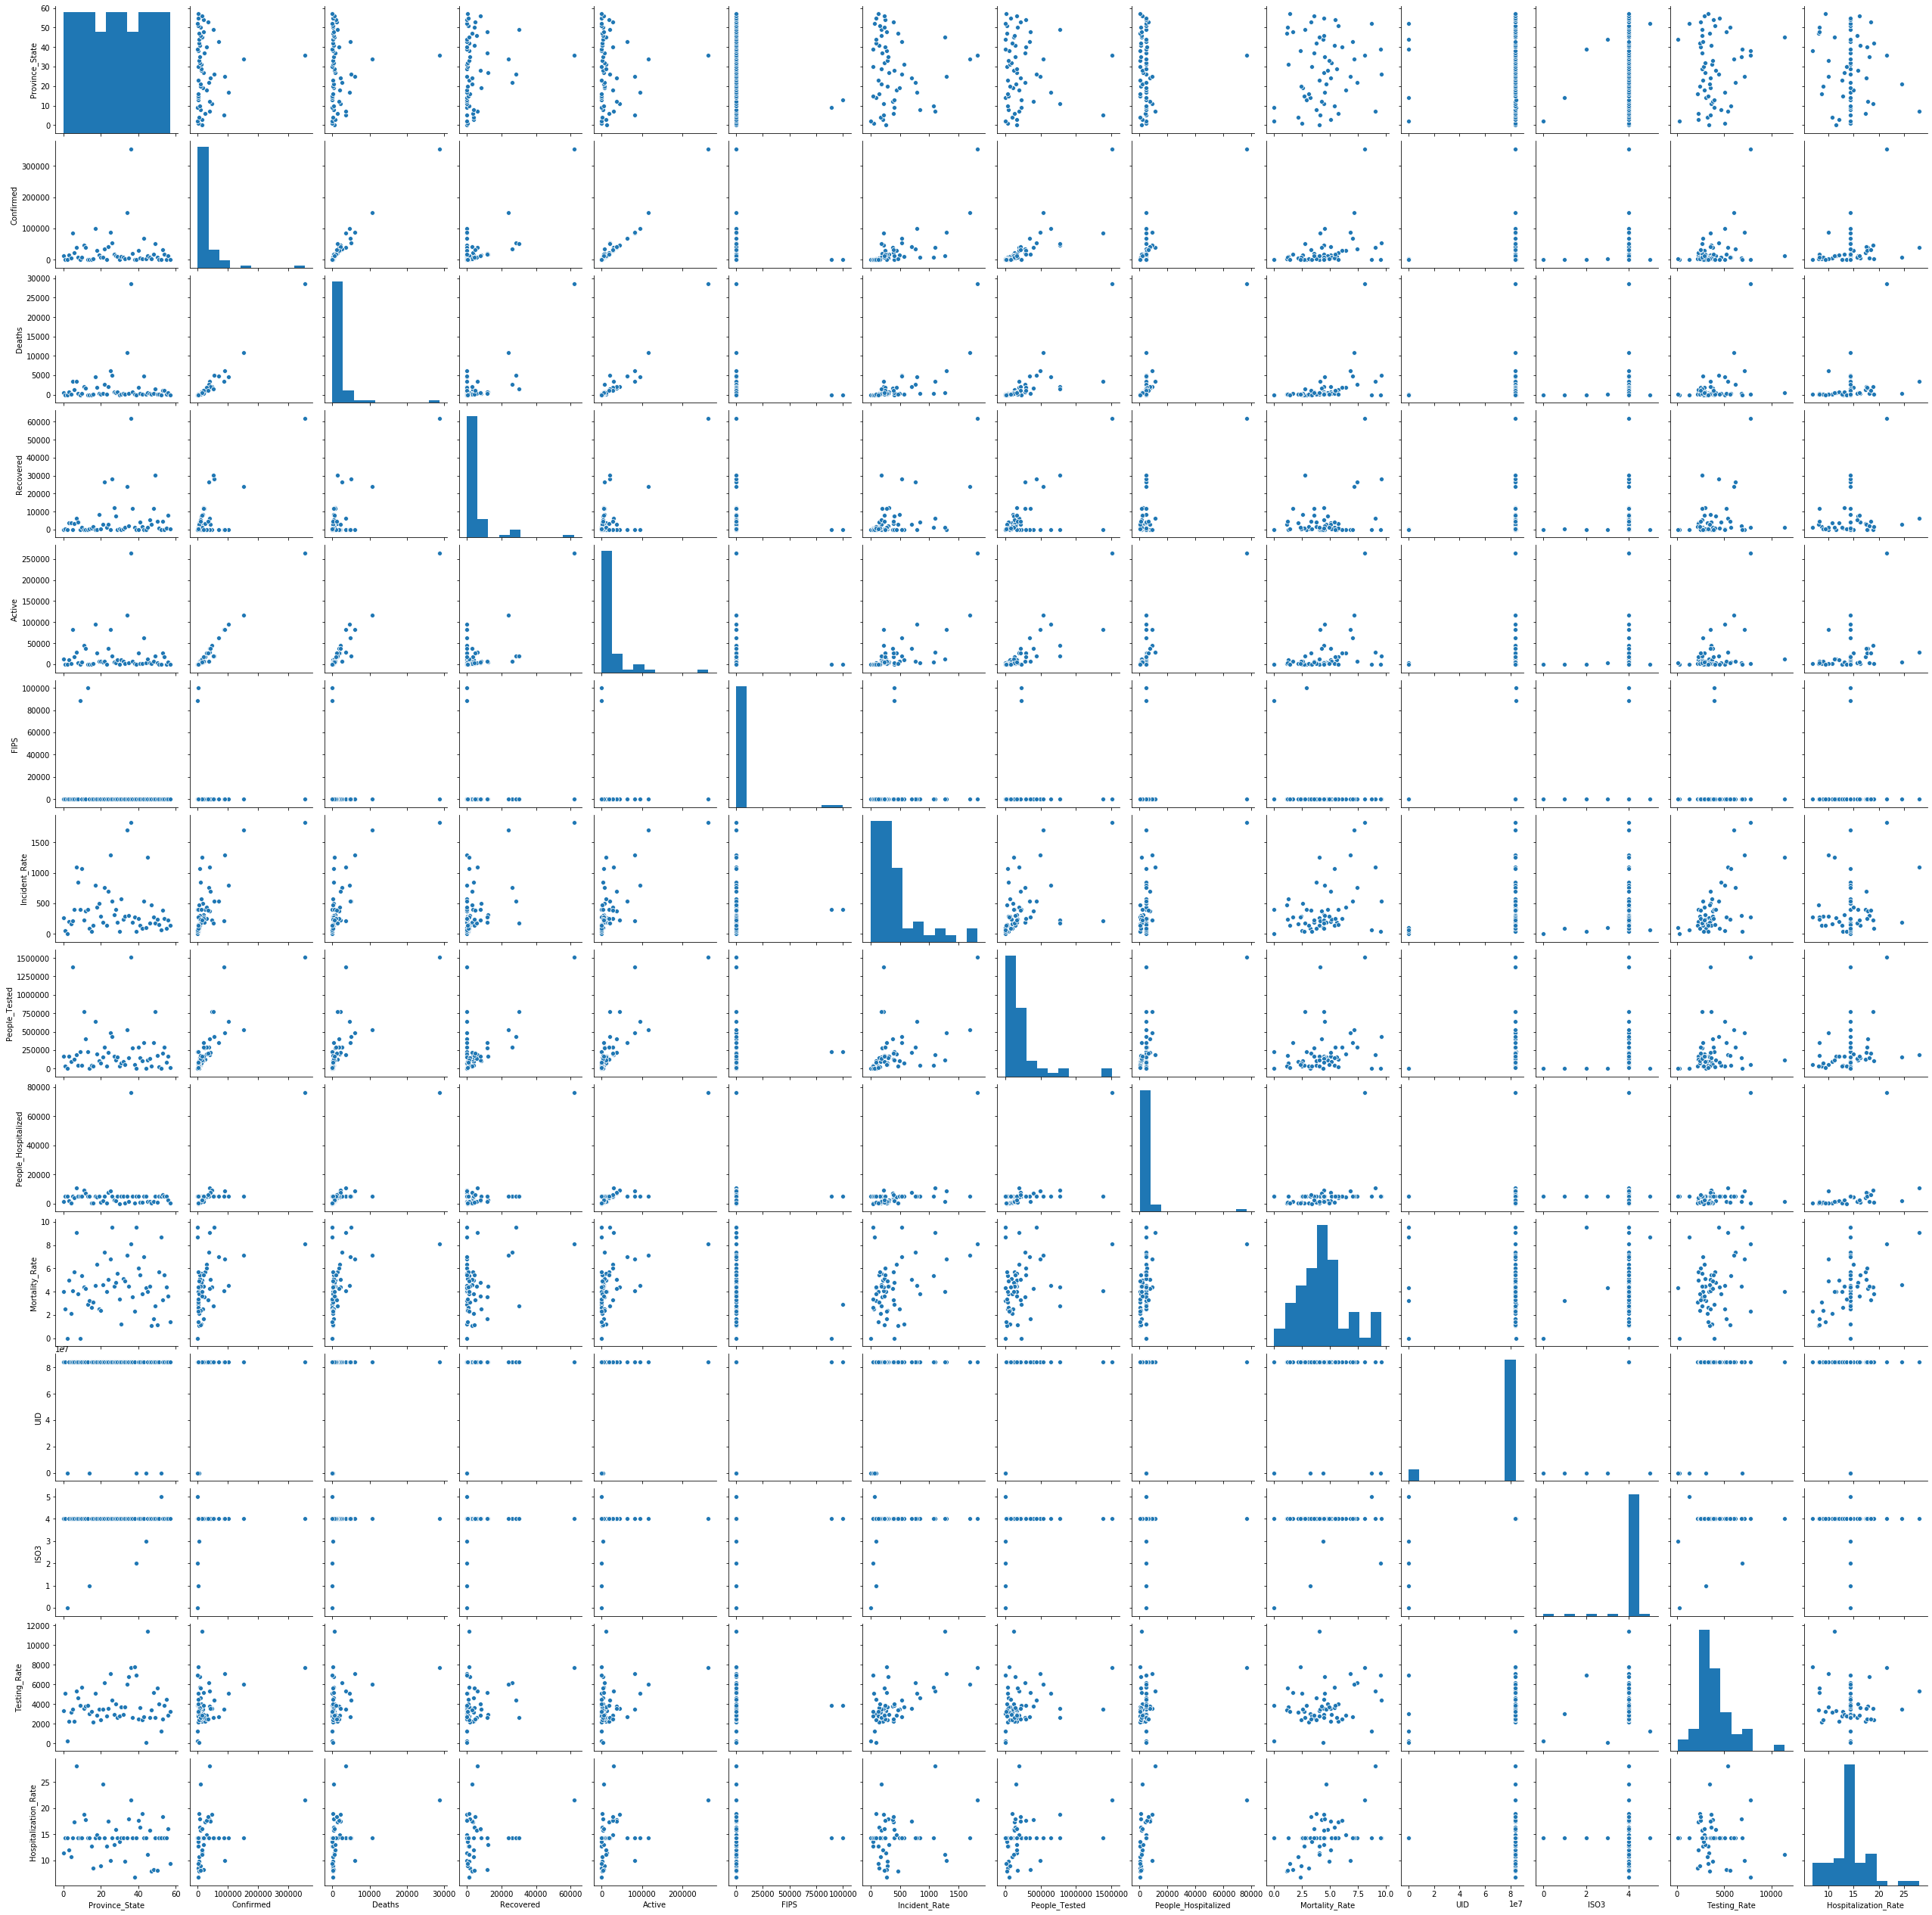

In [26]:
sns.pairplot(df)
plt.show()

In [27]:
#correlation matrix
df.corr()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,0.006490,0.015229,0.136544,-0.027612,-0.195045,-0.078280,-0.065428,5.461319e-03,0.074300,-3.133086e-02,1.967772e-01,0.083183,-1.316941e-01
Confirmed,0.006490,1.000000,0.982191,0.756823,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.386823,1.539717e-01,1.099993e-01,0.332464,2.874708e-01
Deaths,0.015229,0.982191,1.000000,0.782292,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.425715,1.200429e-01,8.558846e-02,0.344465,2.982254e-01
Recovered,0.136544,0.756823,0.782292,1.000000,0.634259,-0.092894,0.518778,0.594784,7.178364e-01,0.312402,1.500108e-01,1.061750e-01,0.269027,2.059917e-01
Active,-0.027612,0.985218,0.954378,0.634259,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.371632,1.463538e-01,1.048243e-01,0.321395,2.845637e-01
FIPS,-0.195045,-0.096696,-0.075053,-0.092894,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.246082,5.802216e-02,4.058567e-02,-0.000100,-1.176128e-04
Incident_Rate,-0.078280,0.708436,0.710105,0.518778,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.376756,2.643102e-01,1.954154e-01,0.620621,1.960289e-01
People_Tested,-0.065428,0.824136,0.739634,0.594784,0.826144,-0.000209,0.441669,1.000000,6.420913e-01,0.239627,2.356350e-01,1.665665e-01,0.230753,2.526802e-01
People_Hospitalized,0.005461,0.869267,0.908279,0.717836,0.835938,0.000009,0.551076,0.642091,1.000000e+00,0.322234,6.697668e-09,4.762249e-18,0.270255,3.775863e-01
Mortality_Rate,0.074300,0.386823,0.425715,0.312402,0.371632,-0.246082,0.376756,0.239627,3.222335e-01,1.000000,-1.108263e-01,1.660733e-01,0.222087,4.348852e-01


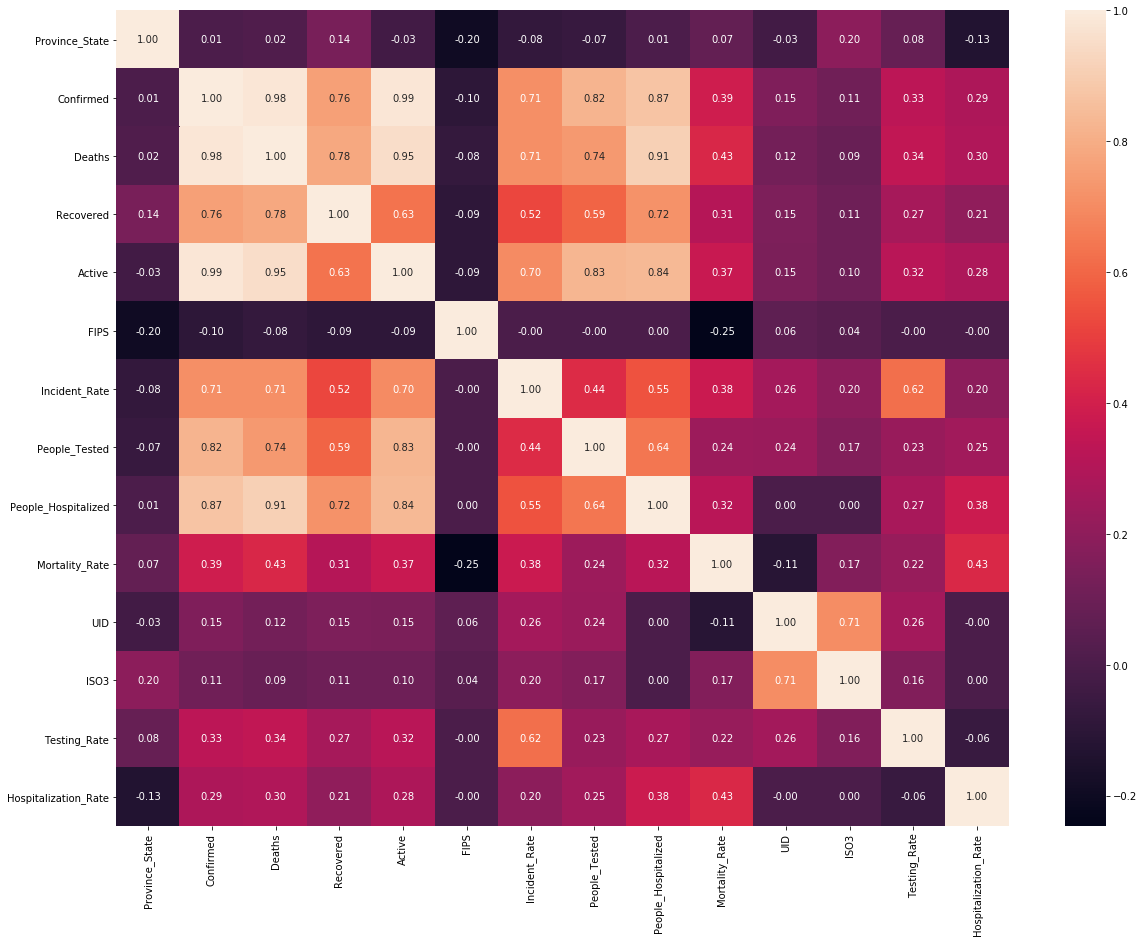

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Data Cleaning

<Figure size 720x360 with 0 Axes>

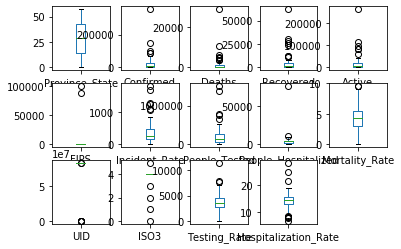

In [29]:
plt.figure(figsize=(10,5))
df.plot(kind='box',subplots=True,layout=(3,5)) 
plt.show()

In [30]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(58, 14)
(46, 14)


In [31]:
df.skew()

Province_State         -0.006325
Confirmed               1.916809
Deaths                  2.182344
Recovered               2.585974
Active                  2.432932
FIPS                    0.004318
Incident_Rate           1.705832
People_Tested           1.769735
People_Hospitalized     0.321958
Mortality_Rate          0.397815
UID                     0.004318
ISO3                    0.000000
Testing_Rate            1.281475
Hospitalization_Rate    0.163926
dtype: float64

In [32]:
# handling skewness
from scipy.stats import boxcox
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [33]:
df.skew()

Province_State         -0.006325
Confirmed              -0.527957
Deaths                 -0.340012
Recovered              -0.932590
Active                 -0.900792
FIPS                    0.004318
Incident_Rate          -0.241672
People_Tested          -0.064450
People_Hospitalized     0.321958
Mortality_Rate          0.397815
UID                     0.004318
ISO3                    0.000000
Testing_Rate            0.652936
Hospitalization_Rate    0.163926
dtype: float64

In [34]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,9.476773,6.259581,0.000000,9.435961,1,5.587976,12.010368,1493.000000,3.999387,84000001,4,8.118190,11.438860
1,1,5.996452,2.397895,5.866468,3.688879,2,4.022051,10.519916,4897.454545,2.493766,84000002,4,8.530098,14.342541
3,3,9.609586,6.617403,8.235891,9.248310,4,5.326851,12.016340,1792.000000,5.011405,84000004,4,7.729234,12.022005
4,4,8.517993,4.682131,8.256607,6.951772,5,5.116692,11.474798,535.000000,2.138717,84000005,4,8.067986,10.693584
6,6,10.034428,7.170120,8.154500,9.799293,8,5.983604,11.789329,3955.000000,5.698118,84000008,4,7.736455,17.348774


# Prediction for DEATHS

In [35]:
y=df['Deaths']
dfx=df.drop(columns=['Deaths'],axis=1)

In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x.head()

,Province_State,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,-1.790947,0.233011,-1.698309,0.547858,-1.805758,0.018077,0.265783,-0.724278,-0.111646,-1.805758,0.0,-0.176634,-0.723172
1,-1.730058,-2.290159,-0.044634,-2.352916,-1.741960,-2.058652,-1.320637,0.651322,-0.965238,-1.741960,0.0,1.102345,0.110579
2,-1.608279,0.329298,0.623273,0.453144,-1.614364,-0.328228,0.272139,-0.603465,0.462104,-1.614364,0.0,-1.384348,-0.555731
3,-1.547389,-0.462088,0.629113,-0.706008,-1.550566,-0.606940,-0.304272,-1.111367,-1.166528,-1.550566,0.0,-0.332517,-0.937168
4,-1.425610,0.637301,0.600330,0.731246,-1.359172,0.542759,0.030512,0.270515,0.851427,-1.359172,0.0,-1.361926,0.973777


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [38]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(30, 13) (16, 13)
(30,) (16,)


In [39]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  66  is  0.9970883499972113


In [40]:
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr = SVR()
grid = GridSearchCV( estimator=SVR(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
linear
{'C': 1, 'kernel': 'linear'}


In [41]:
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsRegressor()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
3
distance
{'n_neighbors': 3, 'weights': 'distance'}


In [42]:
KNR=KNeighborsRegressor(n_neighbors=k,weights=w)
SV=SVR(kernel=s)
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=fr_state)

In [43]:
models = []
models.append(('KNeighborsRegressor', KNR))
models.append(('SVR', SV))
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', DT))

In [44]:
Model = []
rmse = []
cvs=[]
r2score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=fr_state)
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='r2').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print("error:")
    r2s=r2_score(y_test,y_pred)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    print('\n')
    rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
    print("root Mean squared error: ",rmse1)
    rmse.append(rmse1)
    print('\n')

*********************** KNeighborsRegressor ***********************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')


Cross_Val_Score =  0.7280692689326564


error:
r2 score is:  0.7944872527513578


root Mean squared error:  0.7877743151600419


*********************** SVR ***********************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Cross_Val_Score =  0.9836209861069495


error:
r2 score is:  0.9972496020247023


root Mean squared error:  0.09113395210098964


*********************** LinearRegression ***********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Cross_Val_Score =  0.97605465408155


error:
r2 score is:  0.9970883499972113


root Mean squared error:  0.09376743129933014



In [45]:
result = pd.DataFrame({'Model': Model, 'Cross_val_score':cvs,'r2_score':r2score,'root_mean_squared_error':rmse})
result

,Model,Cross_val_score,r2_score,root_mean_squared_error
0,KNeighborsRegressor,0.728069,0.794487,0.787774
1,SVR,0.983621,0.997250,0.091134
2,LinearRegression,0.976055,0.997088,0.093767
3,DecisionTreeRegressor,0.627139,0.804277,0.768782


# Saving the best model

In [46]:
from sklearn.externals import joblib

In [47]:
joblib.dump(LR,'covid-19.pkl')

['covid-19.pkl']

In [48]:
model=joblib.load('covid-19.pkl')

In [50]:
model.predict(x_test.head())

array([7.2875177 , 4.25898361, 6.53602613, 5.6134432 , 2.52201882])